# 葛蘭碧八大法則  

## 程式實作：單線控盤尋找參考買點  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

In [2]:
##### 使用2014年3月6日到2014年5月23日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day21.xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA20','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

買點日期：2014-03-13


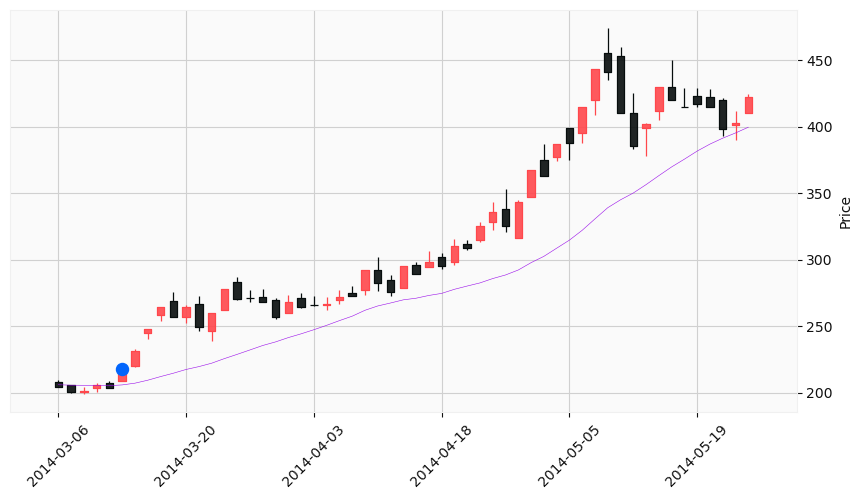

In [3]:
cnt = 0
while cnt <= len(df_k_line) - 1:
    try :
        if df_k_line.iloc[cnt]['Close'] < df_k_line.iloc[cnt+1]['Close'] and df_k_line.iloc[cnt+1]['Close'] < df_k_line.iloc[cnt+2]['Close'] :
            if df_sma.iloc[cnt]['SMA20'] <  df_sma.iloc[cnt+1]['SMA20'] and df_sma.iloc[cnt+1]['SMA20'] <  df_sma.iloc[cnt+2]['SMA20'] :
                if df_sma.iloc[cnt+1]['SMA20'] > df_k_line.iloc[cnt]['Close'] and df_sma.iloc[cnt+2]['SMA20'] < df_k_line.iloc[cnt+1]['Close'] :
                    buy_point_index = cnt+1
                    buy_point_date  = df_k_line.iloc[buy_point_index].name.strftime("%Y-%m-%d")
                    print('買點日期：{}'.format(buy_point_date))
                    # 設定K線格式
                    mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
                    s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
                    # 設定買點與移動平均線
                    buy_point_len = len(np.array(df_k_line['Close']))
                    buy_point = np.array([np.nan]*buy_point_len)
                    buy_point[buy_point_index] = df_k_line.iloc[buy_point_index]['Close']
                    apds = [
                        mpf.make_addplot(buy_point,type='scatter',marker='o',markersize=75,color='xkcd:bright blue'),
                        mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet')
                    ]
                    # 繪出K線圖
                    kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=apds, datetime_format='%Y-%m-%d')
                    mpf.plot(df_k_line,**kwargs)
    except:
        pass
    cnt=cnt+1     